# Illustration Of Vision Transforms

[![View Source On Gitee](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source_en.svg)](https://gitee.com/mindspore/mindspore/blob/master/docs/api/api_python_en/samples/dataset/vision_gallery.ipynb)

This example illustrates the various transforms available in the [mindspore.dataset.vision](https://www.mindspore.cn/docs/en/master/api_python/mindspore.dataset.transforms.html#module-mindspore.dataset.vision) module.


## Preparation

In [1]:
from download import download
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
import numpy as np

import mindspore.dataset as ds
import mindspore.dataset.vision as vision
import mindspore.common.dtype as dtype

# Download opensource datasets
url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/datasets/flamingos.jpg"
download(url, './flamingos.jpg', replace=True)
orig_img = Image.open('flamingos.jpg')

# Env set for randomness and prepare plot function
ds.config.set_seed(66)

def plot(imgs, bbox_list=None, first_origin=True, **kwargs):
    num_rows = 1
    num_cols = len(imgs) + first_origin

    _, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    if first_origin:
        imgs = [orig_img] + imgs
    for idx, img in enumerate(imgs):
        ax = axs[0, idx]
        if isinstance(img, np.ndarray) and img.shape[0] in [1, 3]:
            img = img.transpose(1, 2, 0)
        ax.imshow(img, **kwargs)
        ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

        if bbox_list:
            for bbox in bbox_list[idx]:
                rect = Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=2, edgecolor='g', facecolor='none')
                ax.add_patch(rect)

    if first_origin:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    plt.tight_layout()


file_sizes: 100%|███████████████████████████| 45.8k/45.8k [00:00<00:00, 163kB/s]
Successfully downloaded file to ./flamingos.jpg


## Geometric Transforms

Geometric image transformation refers to the process of altering the geometric properties of an image, such as its shape, size, orientation, or position. It involves applying mathematical operations to the image pixels or coordinates to achieve the desired transformation.

### Pad

The [mindspore.dataset.vision.Pad](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.Pad.html#mindspore.dataset.vision.Pad) transform pads the borders of image with some pixels.

In [ ]:
padded_imgs = [vision.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

![Pad](images/Pad.png)

### PadToSize

The [mindspore.dataset.vision.PadToSize](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.PadToSize.html#mindspore.dataset.vision.PadToSize) transform pads the input image to the specified size.

In [ ]:
pad_to_size = [vision.PadToSize(size=size, fill_value=255, padding_mode=vision.Border.EDGE)(orig_img) for size in (500, 600, 700)]
plot(pad_to_size)

![PadToSize](images/PadToSize.png)

### Perspective

The [mindspore.dataset.vision.Perspective](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.Perspective.html#mindspore.dataset.vision.Perspective) transform applies a perspective transformation to the input image.

In [ ]:
start_points = [[0, 0], [255, 0], [0, 255], [255, 255]]
end_points = [[20, 30], [235, 25], [15, 220], [240, 230]]

perspective = vision.Perspective(start_points=start_points, end_points=end_points, interpolation=vision.Inter.BICUBIC)
imgs = [perspective(orig_img)]
plot(imgs)

![Perspective](images/Perspective.png)

### Resize

The [mindspore.dataset.vision.Resize](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.Resize.html#mindspore.dataset.vision.Resize) transform resizes an image to a given size. Uses the given [mindspore.dataset.vision.Inter](https://www.mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.Inter.html) interpolation method to resize the input image to the given size.

In [ ]:
resized_imgs = [vision.Resize(size=size)(orig_img) for size in (30, 50, 100)]
plot(resized_imgs)

![Resize](images/Resize.png)

### Crop

The [mindspore.dataset.vision.Crop](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.Crop.html#mindspore.dataset.vision.Crop) transform crops the input image.

In [ ]:
crop = vision.Crop(coordinates=(180, 180), size=64)
imgs = [crop(orig_img)]
plot(imgs)


![Crop](images/Crop.png)

### ResizedCrop

The [mindspore.dataset.vision.ResizedCrop](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.ResizedCrop.html#mindspore.dataset.vision.ResizedCrop) crops and resizes the input image.

In [ ]:
resize_crop = [vision.ResizedCrop(125, 100, 125, 100, size=size)(orig_img) for size in (30, 50, 100)]
plot(resize_crop)

![ResizedCrop](images/ResizedCrop.png)

### Rotate

The [mindspore.dataset.vision.Rotate](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.Rotate.html#mindspore.dataset.vision.Rotate) transform rotates the input image.

In [ ]:
rotate = vision.Rotate(degrees=-45, resample=vision.Inter.BILINEAR, expand=True, center=None, fill_value=125)
imgs = [rotate(orig_img)]
plot(imgs)

![Rotate](images/Rotate.png)

### VerticalFlip

The [mindspore.dataset.vision.VerticalFlip](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.VerticalFlip.html#mindspore.dataset.vision.VerticalFlip) transform flips the input image vertically.

In [ ]:
vertical_flip = vision.VerticalFlip()
imgs = [vertical_flip(orig_img)]
plot(imgs)

![VerticalFlip](images/VerticalFlip.png)

### CenterCrop

The [mindspore.dataset.vision.CenterCrop](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.CenterCrop.html#mindspore.dataset.vision.CenterCrop) transform crops the image at the center.

In [ ]:
center_crops = [vision.CenterCrop(size=size)(orig_img) for size in (30, 50, 100)]
plot(center_crops)

![CenterCrop](images/CenterCrop.png)

### FiveCrop

The [mindspore.dataset.vision.FiveCrop](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.FiveCrop.html#mindspore.dataset.vision.FiveCrop) transform crops the given image into one central crop and four corners.

In [ ]:
(top_left, top_right, bottom_left, bottom_right, center) = vision.FiveCrop(size=(100, 100))(orig_img)
plot([top_left, top_right, bottom_left, bottom_right, center])

![FiveCrop](images/FiveCrop.png)

### RandomPerspective

The [mindspore.dataset.vision.RandomPerspective](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomPerspective.html#mindspore.dataset.vision.RandomPerspective) transform
performs random perspective transform on an image.

In [ ]:
perspective_transformer = vision.RandomPerspective(distortion_scale=0.6, prob=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)

![RandomPerspective](images/RandomPerspective.png)

### RandomRotation

The [mindspore.dataset.vision.RandomRotation](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomRotation.html#mindspore.dataset.vision.RandomRotation) transform
rotates an image with random angle.

In [ ]:
rotater = vision.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs)

![RandomRotation](images/RandomRotation.png)

### RandomAffine

The [mindspore.dataset.vision.RandomAffine](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomAffine.html#mindspore.dataset.vision.RandomAffine) transform performs random affine transform on an image.

In [ ]:
affine_transformer = vision.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75))
affine_imgs = [affine_transformer(orig_img) for _ in range(4)]
plot(affine_imgs)

![RandomAffine](images/RandomAffine.png)

### Affine

The [mindspore.dataset.vision.Affine](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.Affine.html#mindspore.dataset.vision.Affine) transform applies an affine transformation to the input image and the center of the image is fixed.

In [ ]:
augmenter = vision.Affine(degrees=45, translate=[0.5, 0.5], scale=3.0, shear=0.5)
imgs = [augmenter(orig_img)]
plot(imgs)

![Affine](images/Affine.png)

### RandomCrop

The [mindspore.dataset.vision.RandomCrop](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomCrop.html#mindspore.dataset.vision.RandomCrop) transform crops an image at a random location.



In [ ]:
cropper = vision.RandomCrop(size=(128, 128))
crops = [cropper(orig_img) for _ in range(4)]
plot(crops)

![RandomCrop](images/RandomCrop.png)

### RandomCropDecodeResize

The [mindspore.dataset.vision.RandomCropDecodeResize](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomCropDecodeResize.html#mindspore.dataset.vision.RandomCropDecodeResize) transform performs random cropping, decoding, and resizing on the input image.

In [ ]:
img_to_ndarray = vision.ToNumpy()
img = img_to_ndarray(orig_img)
encode_img = vision.encode_jpeg(img, 75)
random_crop = vision.RandomCropDecodeResize(size=224, scale=(0.08, 1.0), ratio=(0.75, 1.333), interpolation=vision.Inter.LINEAR)
imgs = [random_crop(encode_img)]
plot(imgs)

![RandomCropDecodeResize](images/RandomCropDecodeResize.png)

### RandomCropWithBBox

The [mindspore.dataset.vision.RandomCropWithBBox](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomCropWithBBox.html#mindspore.dataset.vision.RandomCropWithBBox) transform performs a random crop on the input image and bounding box.

In [ ]:
bboxes = np.array([[50, 50, 125, 125]], dtype=np.float32)
crop_bbox = vision.RandomCropWithBBox(size=300, padding=8, pad_if_needed=False, fill_value=(0, 0, 125), padding_mode=vision.Border.REFLECT)
imgs, bbox = crop_bbox(orig_img, bboxes)
plot([imgs], [bboxes, bbox])

![RandomCropWithBBox](images/RandomCropWithBBox.png)

### RandomResizedCrop

The [mindspore.dataset.vision.RandomResizedCrop](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomResizedCrop.html#mindspore.dataset.vision.RandomResizedCrop) transform crops an image at a random location, and then resizes the crop to a given
size.

In [ ]:
resize_cropper = vision.RandomResizedCrop(size=(32, 32))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
plot(resized_crops)

![RandomResizedCrop](images/RandomResizedCrop.png)

## Photometric Transforms

Photometric image transformation refers to the process of modifying the photometric properties of an image, such as its brightness, contrast, color, or tone. These transformations are applied to change the visual appearance of an image while preserving its geometric structure.

### AdjustBrightness

The [mindspore.dataset.vision.AdjustBrightness](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.AdjustBrightness.html#mindspore.dataset.vision.AdjustBrightness) transform adjusts the brightness of the input image.

In [ ]:
adjust_brightness = [vision.AdjustBrightness(brightness_factor=factor)(orig_img) for factor in (0.5, 1.5, 2.0)]
plot(adjust_brightness)

![AdjustBrightness](images/AdjustBrightness.png)

### AdjustContrast

The [mindspore.dataset.vision.AdjustContrast](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.AdjustContrast.html#mindspore.dataset.vision.AdjustContrast) transform adjusts the contrast of the input image.

In [ ]:
adjust_contrast = [vision.AdjustContrast(contrast_factor=factor)(orig_img) for factor in (0.5, 1.5, 2.0)]
plot(adjust_contrast)

![AdjustContrast](images/AdjustConrast.png)

### AdjustHue

The [mindspore.dataset.vision.AdjustHue](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.AdjustHue.html#mindspore.dataset.vision.AdjustHue) transform adjusts the hue of the input image.

In [ ]:
adjust_hue = [vision.AdjustHue(hue_factor=factor)(orig_img) for factor in (-0.2, 0.5, 0.1)]
plot(adjust_hue)

![AdjustHue](images/AdjustHue.png)

### AdjustGamma

The [mindspore.dataset.vision.AdjustGamma](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.AdjustGamma.html#mindspore.dataset.vision.AdjustGamma) transform applies a [gamma correction](https://en.wikipedia.org/wiki/Gamma_correction) to the input image according to the given gamma value.


In [ ]:
adjust_gamma = vision.AdjustGamma(gamma=3.0, gain=2)
imgs = [adjust_gamma(orig_img)]
plot(imgs)

![AdjustGamma](images/AdjustGamma.png)

### AdjustSaturation

The [mindspore.dataset.vision.AdjustSaturation](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.AdjustSaturation.html#mindspore.dataset.vision.AdjustSaturation) transform adjusts the saturation of the input image.

In [ ]:
adjust_saturation = [vision.AdjustSaturation(saturation_factor=factor)(orig_img) for factor in (.0, 0.5, 2.0)]
plot(adjust_saturation)

![AdjustSaturation](images/AdjustSaturation.png)

### AdjustSharpness

The [mindspore.dataset.vision.AdjustSharpness](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.AdjustSharpness.html#mindspore.dataset.vision.AdjustSharpness) transform adjusts the sharpness of the input image.

In [ ]:
adjust_sharpness = [vision.AdjustSharpness(sharpness_factor=factor)(orig_img) for factor in (0.5, 1.5, 2.0)]
plot(adjust_sharpness)

![AdjustSharpness](images/AdjustSharpness.png)

### ConvertColor

The [mindspore.dataset.vision.ConvertColor](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.ConvertColor.html#mindspore.dataset.vision.ConvertColor) transform converts the color space of the input image.

In [ ]:
convert_color = vision.ConvertColor(convert_mode=vision.ConvertMode.COLOR_RGB2GRAY)
imgs = [convert_color(orig_img)]
plot(imgs)

![ConvertColor](images/ConvertColor.png)

### Normalize

The [mindspore.dataset.vision.Normalize](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.Normalize.html#mindspore.dataset.vision.Normalize) transform normalizes the input image with with:$output[channel] = \frac{input[channel] - mean[channel]}{std[channel]} \quad for \quad channel \geq 1$.

In [ ]:
normalize = vision.Normalize(mean=[121.0, 115.0, 100.0], std=[70.0, 68.0, 71.0], is_hwc=True)
normalized_img = normalize(orig_img)
plot([normalized_img])

![Normalize](images/Normalize.png)

### NormalizePad

The [mindspore.dataset.vision.NormalizePad](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.NormalizePad.html#mindspore.dataset.vision.NormalizePad) transform normalizes the input image with mean and standard deviation, and then pads the image.

In [ ]:
normalized_pad = vision.NormalizePad(mean=[121.0, 115.0, 100.0], std=[70.0, 68.0, 71.0], dtype="float32")
normalized_pad_img = normalized_pad(orig_img)
plot([normalized_pad_img])

![NormalizePad](images/NormalizePad.png)

### Equalize

The [mindspore.dataset.vision.Equalize](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.Equalize.html#mindspore.dataset.vision.Equalize) transform equalizes the histogram of the input image.

In [ ]:
equalize = vision.Equalize()
imgs = [equalize(orig_img)]
plot(imgs)

![Equalize](images/Equalize.png)

### Invert

The [mindspore.dataset.vision.Invert](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.Invert.html#mindspore.dataset.vision.Invert) transform inverts the input image.
Changes the value of each channel of the RGB value from x to 255-x.

In [ ]:
invert = vision.Invert()
imgs = [invert(orig_img)]
plot(imgs)

![Invert](images/Invert.png)

### Posterize

The [mindspore.dataset.vision.Posterize](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.Posterize.html#mindspore.dataset.vision.Posterize) transform reduces the number of bits for each color channel to obtain a poster-style image.

In [ ]:
posterize = [vision.Posterize(bits=bits)(orig_img) for bits in (2, 6, 8)]
plot(posterize)

![Posterize](images/Posterize.png)

### Rescale

The [mindspore.dataset.vision.Rescale](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.Rescale.html#mindspore.dataset.vision.Rescale) transform rescales the input image.

In [ ]:
rescale = vision.Rescale(1.0 / 128.0, -1.0)
rescaled_img = rescale(orig_img)
plot([rescaled_img])

![Rescale](images/Rescale.png)

### Solarize

The [mindspore.dataset.vision.Solarize](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.Solarize.html#mindspore.dataset.vision.Solarize) transform inverts all pixel values above a threshold. Given pixel thresholds min and max, invert all pixel values ​​within the thresholds `[min, max]` to expose the input image as expected.

In [ ]:
solarize = [vision.Solarize(threshold=threshold)(orig_img) for threshold in (0, 128.0, 255.0)]
plot(solarize)

![Solarize](images/Solarize.png)

### Grayscale

The [mindspore.dataset.vision.Grayscale](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.Grayscale.html#mindspore.dataset.vision.Grayscale) transform converts an image to grayscale.

In [ ]:
gray_img = vision.Grayscale()(orig_img)
plot([gray_img], cmap='gray')

![Grayscale](images/Grayscale.png)

### RandomGrayscale

The [mindspore.dataset.vision.RandomGrayscale](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomGrayscale.html#mindspore.dataset.vision.RandomGrayscale) transform randomly converts an image to grayscale with a given probability.

In [ ]:
random_grayscale = vision.RandomGrayscale(prob=0.5)
grayscale_img = random_grayscale(orig_img)
plot([grayscale_img])

![RandomGrayscale](images/RandomGrayscale.png)

### RandomColorAdjust

The [mindspore.dataset.vision.RandomColorAdjust](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomColorAdjust.html#mindspore.dataset.vision.RandomColorAdjust) transform randomly changes the brightness, contrast, saturation and hue of the input image.

In [ ]:
jitter = vision.RandomColorAdjust(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

![RandomColorAdjust](images/RandomColorAdjust.png)

### GaussianBlur

The [mindspore.dataset.vision.GaussianBlur](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.GaussianBlur.html#mindspore.dataset.vision.GaussianBlur) transform
performs gaussian blur transform on an image.

In [ ]:
blurrer = vision.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
plot(blurred_imgs)

![GaussianBlur](images/GaussianBlur.png)

### RandomInvert

The [mindspore.dataset.vision.RandomInvert](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomInvert.html#mindspore.dataset.vision.RandomInvert) transform randomly inverts the colors of the given image.



In [ ]:
inverter = vision.RandomInvert()
invertered_imgs = [inverter(orig_img) for _ in range(4)]
plot(invertered_imgs)

![RandomInvert](images/RandomInvert.png)

### RandomPosterize

The [mindspore.dataset.vision.RandomPosterize](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomPosterize.html#mindspore.dataset.vision.RandomPosterize) transform randomly reduces the bit depth of the color channels of image to create a high contrast and vivid color image.


In [ ]:
posterizer = vision.RandomPosterize(bits=2)
posterized_imgs = [posterizer(orig_img) for _ in range(4)]
plot(posterized_imgs)

![RandomPosterize](images/RandomPosterize.png)

### RandomSolarize

The [mindspore.dataset.vision.RandomSolarize](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomSolarize.html#mindspore.dataset.vision.RandomSolarize) transform randomly solarizes the image by inverting pixel values within specified threshold.



In [ ]:
solarizer = vision.RandomSolarize(threshold=(0, 192))
solarized_imgs = [solarizer(orig_img) for _ in range(4)]
plot(solarized_imgs)

![RandomSolarize](images/RandomSolarize.png)

### RandomAdjustSharpness

The [mindspore.dataset.vision.RandomAdjustSharpness](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomAdjustSharpness.html#mindspore.dataset.vision.RandomAdjustSharpness) transform randomly adjusts the sharpness of the given image.



In [ ]:
sharpness_adjuster = vision.RandomAdjustSharpness(degree=2)
sharpened_imgs = [sharpness_adjuster(orig_img) for _ in range(4)]
plot(sharpened_imgs)

![RandomAdjustSharpness](images/RandomAdjustSharpness.png)

### RandomAutoContrast

The [mindspore.dataset.vision.RandomAutoContrast](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomAutoContrast.html#mindspore.dataset.vision.RandomAutoContrast) transform randomly applies autocontrast to the given image.

In [ ]:
autocontraster = vision.RandomAutoContrast()
autocontrasted_imgs = [autocontraster(orig_img) for _ in range(4)]
plot(autocontrasted_imgs)

![RandomAutoContrast](images/RandomAutoContrast.png)

### RandomEqualize

The [mindspore.dataset.vision.RandomEqualize](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomEqualize.html#mindspore.dataset.vision.RandomEqualize) transform randomly equalizes the histogram of the given image.



In [ ]:
equalizer = vision.RandomEqualize()
equalized_imgs = [equalizer(orig_img) for _ in range(4)]
plot(equalized_imgs)

![RandomEqualize](images/RandomEqualize.png)

## Augmentation Transforms

The following transforms are combinations of multiple transforms, they usually come from papers.

### AutoAugment

The [mindspore.dataset.vision.AutoAugment](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.AutoAugment.html#mindspore.dataset.vision.AutoAugment) transform applies AutoAugment  method based on [AutoAugment: Learning Augmentation Strategies from Data](https://arxiv.org/pdf/1805.09501.pdf).

In [ ]:
augmenter = vision.AutoAugment(policy=vision.AutoAugmentPolicy.IMAGENET)
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

![AutoAugment](images/AutoAugment.png)

### BoundingBoxAugment

The [mindspore.dataset.vision.BoundingBoxAugment](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.BoundingBoxAugment.html#mindspore.dataset.vision.BoundingBoxAugment) transform applies a augmentation to the bounding box of the image using given augmentation.

In [ ]:
bboxes = np.array([[50, 50, 125, 125]], dtype=np.float32)
transform = vision.RandomRotation(degrees=90)
bbox_augment = vision.BoundingBoxAugment(transform=transform, ratio=1.0)
img, bbox = bbox_augment(orig_img, bboxes)
plot([img], [bboxes, bbox])

![BoundingBoxAugment](images/BoundingBoxAugment.png)

### LinearTransformation

The [mindspore.dataset.vision.LinearTransformation](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.LinearTransformation.html#mindspore.dataset.vision.LinearTransformation) transform applies a linear transformation to the input numpy.ndarray image with a square transformation matrix and a mean vector.

In [ ]:
height, width = 64, 64
dim = 3 * height * width

resize = vision.Resize((height, width))
resized_img = resize(orig_img)

augmenter = vision.LinearTransformation(transformation_matrix=np.eye(dim), mean_vector=np.zeros(dim))
array_img = np.array(resized_img).reshape(dim)
transformed_img = augmenter(array_img)
transformed_img = transformed_img.reshape(height, width, 3).astype(np.uint16)

plot([transformed_img])

![LinearTransformation](images/LinearTransformation.png)

### RandomColor

The [mindspore.dataset.vision.RandomColor](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomColor.html#mindspore.dataset.vision.RandomColor) transform randomly adjusts color of the input image. The input image can be RGB image.

In [ ]:
augmenter = vision.RandomColor(degrees=[0.1, 1.9])
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

![RandomColor](images/RandomColor.png)

### RandomLighting

The [mindspore.dataset.vision.RandomLighting](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomLighting.html#mindspore.dataset.vision.RandomLighting) transform randomly changes the brightness of the input image. Adds AlexNet PCA noise to the image. The eigenvalues ​​and eigenvectors of AlexNet PCA noise are calculated from the ImageNet dataset.

In [ ]:
augmenter = vision.RandomLighting(alpha=1.0)
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

![RandomLighting](images/RandomLighting.png)

### RandomSelectSubpolicy

The [mindspore.dataset.vision.RandomSelectSubpolicy](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomSelectSubpolicy.html#mindspore.dataset.vision.RandomSelectSubpolicy) transform randomly selects a subpolicy from a list of subpolicies.

In [ ]:
policy = [[(vision.RandomRotation((45, 45)), 0.5), (vision.RandomVerticalFlip(), 0.5)]]
augmenter = vision.RandomSelectSubpolicy(policy)
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

![RandomSelectSubpolicy](images/RandomSelectSubpolicy.png)

### ToTensor

The [mindspore.dataset.vision.ToTensor](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.ToTensor.html#mindspore.dataset.vision.ToTensor) transform converts the input PIL image or Numpy array to a tensor.

In [ ]:
to_tensor = vision.ToTensor()
img = to_tensor(orig_img)
plot([img])

![ToTensor](images/ToTensor.png)

### ToType

The [mindspore.dataset.vision.ToType](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.ToType.html#mindspore.dataset.vision.ToType) transform converts the input image to the specified data type.

In [ ]:
to_type = vision.ToType(dtype.float32)
img = to_type(orig_img)
plot([img])

![ToType](images/ToType.png)

### HWC2CHW

The [mindspore.dataset.vision.HWC2CHW](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.HWC2CHW.html#mindspore.dataset.vision.HWC2CHW) transform changes the image from HWC to CHW format.

In [ ]:
hsc2chw = vision.HWC2CHW()
img = [hsc2chw(orig_img)]
plot(img)

![HWC2CHW](images/HWC2CHW.png)

### UniformAugment

The [mindspore.dataset.vision.UniformAugment](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.UniformAugment.html#mindspore.dataset.vision.UniformAugment) transform applies a series of augmentation operations to the input image. The implementation of the augmentation is based on the paper [UniformAugment: A Simple Data Augmentation Strategy for Consistent Neural Network Training](https://arxiv.org/pdf/2003.14348.pdf).

In [ ]:
transforms = [vision.RandomCrop(size=[20, 40], padding=[32, 32, 32, 32]), vision.RandomRotation(45)]
augmenter = vision.UniformAugment(transforms=transforms, num_ops=2)
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

![UniformAugment](images/UniformAugment.png)

### CutOut

The [mindspore.dataset.vision.CutOut](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.CutOut.html#mindspore.dataset.vision.CutOut) randomly crops a rectangular area from the input image and the pixel values ​​in the area are set to 0.

In [ ]:
augmenter = vision.CutOut(length=32, num_patches=2, is_hwc=True)
imgs = [augmenter(orig_img)]
plot(imgs)

![CutOut](images/CutOut.png)

### CutMixBatch

The [mindspore.dataset.vision.CutMixBatch](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.CutMixBatch.html#mindspore.dataset.vision.CutMixBatch) performs CutMix data augmentation on the input images. It mixes the image contents by randomly selecting two images from a batch of images, then cutting a random rectangular region from one image and pasting it to the other image. **Labels should be converted to one-hot encoding format and batched before using this operation**.

In [ ]:
transformer = vision.Grayscale(3)
gray_img = transformer(orig_img)

images = np.stack([np.array(orig_img), gray_img, np.array(orig_img), gray_img], axis=0)
num_classes = 10
batch_size = 4
labels = np.random.randint(0, num_classes, size=(batch_size,))
one_hot_labels = np.eye(num_classes)[labels]

augment = vision.CutMixBatch(image_batch_format=vision.ImageBatchFormat.NHWC, alpha=1.0, prob=1.0)
images, labels = augment(images, one_hot_labels)
transformed_images = [Image.fromarray(image.astype(np.uint8)) for image in images]
plot(transformed_images)

![CutMixBatch](images/CutMixBatch.png)

### MixUp

The [mindspore.dataset.vision.MixUp](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.MixUp.html#mindspore.dataset.vision.MixUp) performs MixUp data augmentation on the input images. Randomly mix a batch of input `numpy.ndarray` images and their labels. Multiply each image by a weight `lambda` randomly generated from a Beta distribution, and add the product of the other image and `1-lambda`. Mix the labels corresponding to the images with the same `lambda` value. **Make sure the labels are pre-one-hot encoded**.

In [ ]:
transformer = vision.Grayscale(3)
gray_img = transformer(orig_img)

images = np.stack([np.array(orig_img), gray_img, np.array(orig_img), gray_img], axis=0)
num_classes = 10
batch_size = 4
labels = np.random.randint(0, num_classes, size=(batch_size,))
one_hot_labels = np.eye(num_classes)[labels]

mixup = vision.MixUp(batch_size=batch_size, alpha=1.0)
images, labels = mixup(images, one_hot_labels)
transformed_images = [Image.fromarray(image.astype(np.uint8)) for image in images]
plot(transformed_images)

![MixUp](images/MixUp.png)

### MixUpBatch

The [mindspore.dataset.vision.MixUpBatch](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.MixUpBatch.html#mindspore.dataset.vision.MixUpBatch) performs MixUp data augmentation on the input images. Randomly selects two images from the batch, multiplies one image by a random weight `lambda`, and the other image by `1 - lambda`, and adds the two together. The same process is applied to the annotations. The value of `lambda` is generated from a Beta distribution with parameter `alpha`. The calculation method is: randomly generate two coefficients $x_1$ and $x_2$ in the range `[alpha, 1]`, and calculate $lambda = x_1 / (x_1 + x_2)$. **Before calling this process, the annotations need to be made into one-hot format and batched**.

In [ ]:
transformer = vision.Grayscale(3)
gray_img = transformer(orig_img)

images = np.stack([np.array(orig_img), gray_img, np.array(orig_img), gray_img], axis=0)
num_classes = 10
batch_size = 4
labels = np.random.randint(0, num_classes, size=(batch_size,))
one_hot_labels = np.eye(num_classes)[labels]

mixup_batch = vision.MixUpBatch(alpha=2.0)
images, labels = mixup_batch(images, one_hot_labels)
transformed_images = [Image.fromarray(image.astype(np.uint8)) for image in images]
plot(transformed_images)

![MixUpBatch](images/MixUpBatch.png)

The alpha parameter in [MixUp](https://www.mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.MixUp.html#mindspore.dataset.vision.MixUp) and [MixUpBatch](https://www.mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.MixUpBatch.html#mindspore.dataset.vision.MixUpBatch) is the shape parameter of the Beta distribution used to generate the mixing coefficients.

The larger the value of alpha, the more uniform the Beta distribution tends to be, and the lambda value will be more inclined to 0.5, resulting in a more balanced image mixing. On the contrary, when alpha is small, the lambda value is more likely to be close to 0 or 1, which means that the mixed image will be more inclined to one of the original images.

To better understand how different alpha values ​​lead to different mixing effects, refer to the following examples. As original image use already defined orig_img and its rotated image.

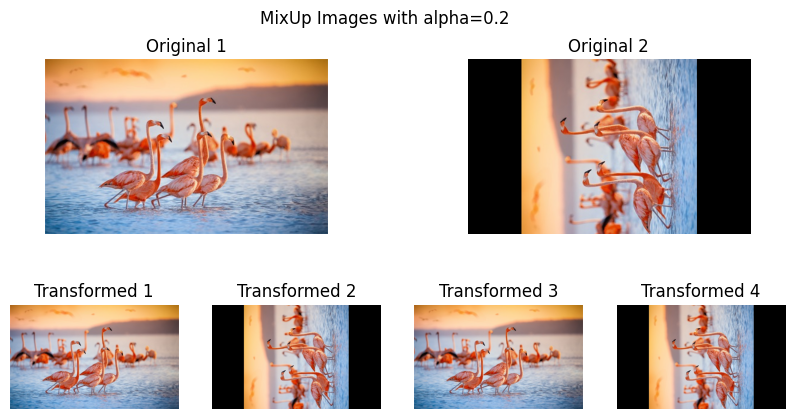

Lambda value for alpha=0.2: 0.9782197460880944


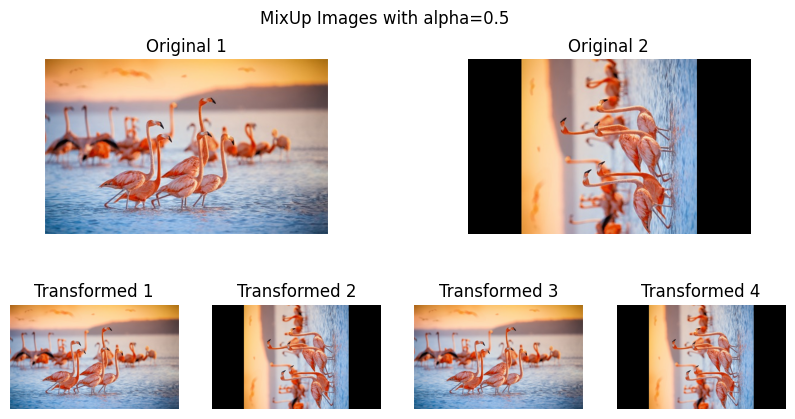

Lambda value for alpha=0.5: 0.9870954124682336


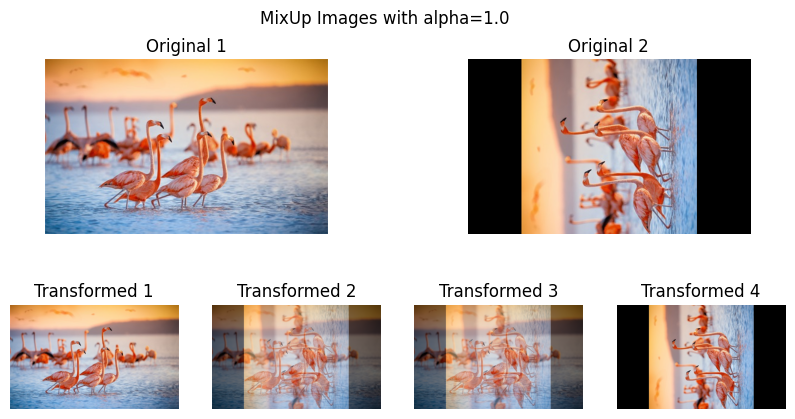

Lambda value for alpha=1.0: 0.13932897475036013


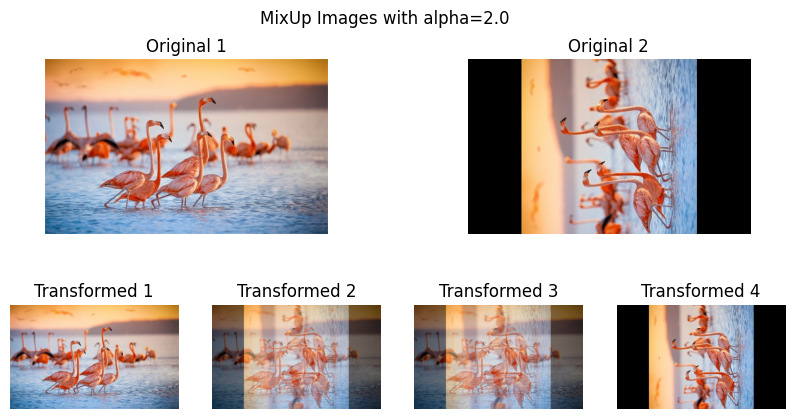

Lambda value for alpha=2.0: 0.22601399133292524
Execution Time: 0.0014693737030029297 seconds


In [58]:
# Define the illustration function
def visualize_images(original, transformed, title):
    plt.figure(figsize=(10, 5))
    for i in range(len(original)):
        plt.subplot(2, len(original), i + 1)
        plt.imshow(original[i])
        plt.title(f"Original {i+1}")
        plt.axis('off')

    for i in range(len(transformed)):
        plt.subplot(2, len(transformed), len(original) + i + 3)
        plt.imshow(transformed[i])
        plt.title(f"Transformed {i+1}")
        plt.axis('off')

    plt.suptitle(title)
    plt.show()

# Loading the image
transformer = vision.Rotate(degrees=90)
gray_img = transformer(orig_img)

# Creating a batch of images
images = np.stack([np.array(orig_img), gray_img, np.array(orig_img), gray_img], axis=0)
num_classes = 10
batch_size = 4
labels = np.random.randint(0, num_classes, size=(batch_size,))
one_hot_labels = np.eye(num_classes)[labels]

# Calculate lambda value
def calculate_lambda(alpha):
    x1 = np.random.beta(alpha, alpha)
    x2 = np.random.beta(alpha, alpha)
    return x1 / (x1 + x2)

# Calling MixUpBatch augmenter.
def apply_mixup_and_visualize(alpha=1.0):
    mixup_batch = vision.MixUpBatch(alpha=alpha)
    mixed_images, _ = mixup_batch(images, one_hot_labels)
    transformed_images = [Image.fromarray(image.astype(np.uint8)) for image in mixed_images]
    visualize_images([orig_img, gray_img], transformed_images, f"MixUp Images with alpha={alpha}")
    lambda_val = calculate_lambda(alpha)
    print(f"Lambda value for alpha={alpha}: {lambda_val}")

# Test different alpha values
for alpha in [0.2, 0.5, 1.0, 2.0]:
    apply_mixup_and_visualize(alpha=alpha)

# Performance Testing
import time
start_time = time.time()
mixup_batch = vision.MixUpBatch(alpha=1.0)
mixed_images, _ = mixup_batch(images, one_hot_labels)
print("Execution Time:", time.time() - start_time, "seconds")

### SlicePatches

The [mindspore.dataset.vision.SlicePatches](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.SlicePatches.html#mindspore.dataset.vision.SlicePatches) transform slices the input image into patches of the specified size.

In [ ]:
num_h, num_w = 1, 4
slice_patches_op = vision.SlicePatches(num_height=num_h, num_width=num_w, slice_mode=vision.SliceMode.PAD, fill_value=0)

# Convert image to Mindspore dataset
data = np.array([orig_img])
numpy_slices_dataset = ds.NumpySlicesDataset(data, ["image"])
transforms_list = [slice_patches_op]
cols = ['img' + str(x) for x in range(num_h * num_w)]

# Apply the SlicePatches transform
numpy_slices_dataset = numpy_slices_dataset.map(operations=transforms_list, input_columns=["image"], output_columns=cols)

# Retrieve the patched images and plot them
for item in numpy_slices_dataset.create_dict_iterator(num_epochs=1, output_numpy=True):
    patch_images = [item[col] for col in cols]
    plot(patch_images)

![SlicePatches](images/SlicePatches.png)

### Erase

The [mindspore.dataset.vision.Erase](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.Erase.html#mindspore.dataset.vision.Erase) transform erases a rectangular area from the input image and fills the area with the specified pixel value.

In [ ]:
augmenter = vision.Erase(top=20, left=25, height=50, width=50, value=128, inplace=True)
imgs = [augmenter(orig_img)]
plot(imgs)

![Erase](images/Erase.png)

### RandAugment

The [mindspore.dataset.vision.RandAugment](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandAugment.html#mindspore.dataset.vision.RandAugment) applies RandAugment method based on [RandAugment: Learning Augmentation Strategies from Data](https://arxiv.org/pdf/1909.13719.pdf).



In [ ]:
augmenter = vision.RandAugment()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

![RandAugment](images/RandAugment.png)

### TrivialAugmentWide

The [mindspore.dataset.vision.TrivialAugmentWide](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.TrivialAugmentWide.html#mindspore.dataset.vision.TrivialAugmentWide) applies TrivialAugmentWide method based on [TrivialAugmentWide: Tuning-free Yet State-of-the-Art Data Augmentation](https://arxiv.org/abs/2103.10158).



In [ ]:
augmenter = vision.TrivialAugmentWide()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

![TrivialAugmentWide](images/TrivialAugmentWide.png)

## Randomly-applied transforms

Some transforms are randomly-applied with a probability. That is, the
transformed image may be the same as the original one.

### RandomHorizontalFlip

The [mindspore.dataset.vision.RandomHorizontalFlip](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomHorizontalFlip.html#mindspore.dataset.vision.RandomHorizontalFlip) transform performs horizontal flip of an image, with a given probability.

In [ ]:
hflipper = vision.RandomHorizontalFlip(0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

![RandomHorizontalFlip](images/RandomHorizontalFlip.png)

### RandomHorizontalFlipWithBBox

The [mindspore.dataset.vision.RandomHorizontalFlipWithBBox](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomHorizontalFlipWithBBox.html#mindspore.dataset.vision.RandomHorizontalFlipWithBBox) transform performs horizontal flip of an image and bounding box, with a given probability.

In [ ]:
random_flip = vision.RandomHorizontalFlipWithBBox(0.7)
bboxes = np.array([[50, 50, 125, 125]], dtype=np.float32)
img, bbox = random_flip(orig_img, bboxes)
plot([img], [bboxes, bbox])

![RandomHorizontalFlipWithBBox](images/RandomHorizontalFlipWithBBox.png)

### RandomVerticalFlip

The [mindspore.dataset.vision.RandomVerticalFlip](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomVerticalFlip.html#mindspore.dataset.vision.RandomVerticalFlip) transform performs vertical flip of an image, with a given probability.

In [ ]:
vflipper = vision.RandomVerticalFlip(0.5)
transformed_imgs = [vflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

![RandomVerticalFlip](images/RandomVerticalFlip.png)

### RandomVerticalFlipWithBBox

The [mindspore.dataset.vision.RandomVerticalFlipWithBBox](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomVerticalFlipWithBBox.html#mindspore.dataset.vision.RandomVerticalFlipWithBBox) transform performs vertical flip of an image and bounding box, with a given probability.

In [ ]:
random_flip = vision.RandomVerticalFlipWithBBox(0.7)
bboxes = np.array([[50, 50, 125, 125]], dtype=np.float32)
img, bbox = random_flip(orig_img, bboxes)
plot([img], [bboxes, bbox])

![RandomVerticalFlipWithBBox](images/RandomVerticalFlipWithBBox.png)

### RandomApply

The [mindspore.dataset.transforms.RandomApply](https://mindspore.cn/docs/en/master/api_python/dataset_transforms/mindspore.dataset.transforms.RandomApply.html#mindspore.dataset.transforms.RandomApply)  transform randomly applies a list of transforms, with a given probability.

In [ ]:
import mindspore.dataset.transforms as T

applier = T.RandomApply(transforms=[vision.RandomCrop(size=(64, 64))], prob=0.5)
transformed_imgs = [applier(orig_img) for _ in range(4)]
plot(transformed_imgs)

![RandomApply](images/RandomApply.png)

## Process Image File In Dataset Pipeline

Use the [mindspore.dataset.ImageFolderDataset](https://mindspore.cn/docs/en/master/api_python/dataset/mindspore.dataset.ImageFolderDataset.html#mindspore.dataset.ImageFolderDataset) to read image content into dataset pipeline and then we can do further transforms based on pipeline.


file_sizes: 100%|███████████████████████████| 45.7k/45.7k [00:00<00:00, 167kB/s]
Extracting zip file...
Successfully downloaded / unzipped to ./
column names: ['image', 'label']
>>>>> after decode
(64, 64, 3) 0
(64, 64, 3) 0
(64, 64, 3) 0
(64, 64, 3) 1
(64, 64, 3) 1
(64, 64, 3) 1
(64, 64, 3) 1
(64, 64, 3) 2
(64, 64, 3) 2
(64, 64, 3) 2
(64, 64, 3) 3
(64, 64, 3) 3
(64, 64, 3) 3
(64, 64, 3) 4
(64, 64, 3) 4
(64, 64, 3) 4
>>>>> after resize
(48, 48, 3) 0
(48, 48, 3) 0
(48, 48, 3) 0
(48, 48, 3) 1
(48, 48, 3) 1
(48, 48, 3) 1
(48, 48, 3) 1
(48, 48, 3) 2
(48, 48, 3) 2
(48, 48, 3) 2
(48, 48, 3) 3
(48, 48, 3) 3
(48, 48, 3) 3
(48, 48, 3) 4
(48, 48, 3) 4
(48, 48, 3) 4


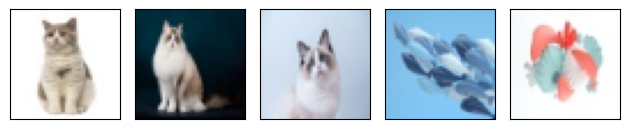

In [68]:
from download import download

import os
import mindspore.dataset as ds

# Download a small imagenet as example
url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/datasets/imageset.zip"
download(url, "./", kind="zip", replace=True)

# There are 5 classes in the image folder.
os.listdir("./imageset")

# Load these 5 classes into dataset pipeline
dataset = ds.ImageFolderDataset("./imageset", shuffle=False)

# check the column names inside the dataset. "image" column represents the image content and "label" column represents the corresponding label of image.
print("column names:", dataset.get_col_names())

# since the original image is not decoded, apply decode first on "image" column
dataset = dataset.map(vision.Decode(), input_columns=["image"])

# check results
print(">>>>> after decode")
for data, label in dataset:
    print(data.shape, label)

# let's do some transforms on dataset
# apply resize on images
dataset = dataset.map(vision.Resize(size=(48, 48)), input_columns=["image"])

# check results
print(">>>>> after resize")
images = []
for image, label in dataset:
    images.append(image.asnumpy())
    print(image.shape, label)

plot(images[:5], first_origin=False)